- dataset: https://www.kaggle.com/datasets/outliersloop/footballyolov8
- yolov8 github: https://github.com/ultralytics/ultralytics
- yolov8 docs: https://docs.ultralytics.com/quickstart/

# Install YOLOv8:

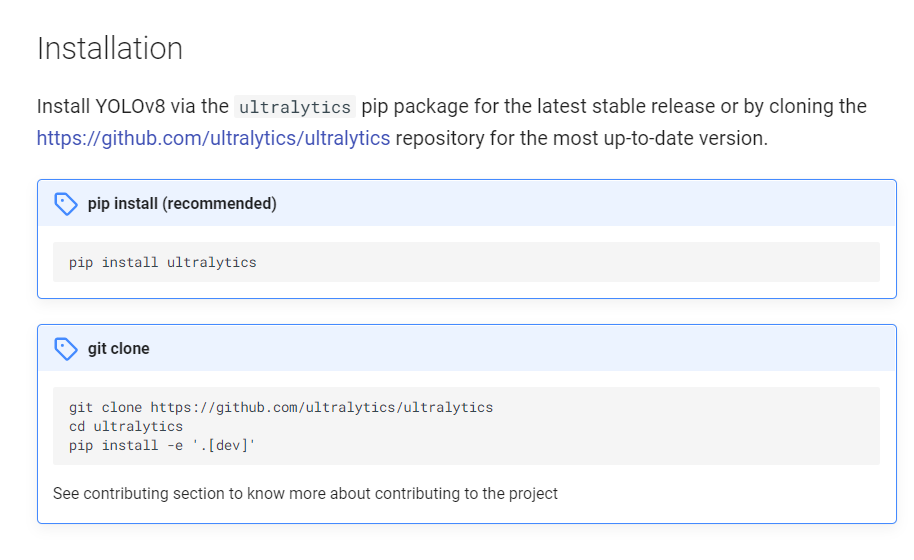

In [ ]:

# Pip install (recommended)

!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.7/645.7 kB 8.7 MB/s eta 0:00:00


# Creating train-val split

In [ ]:
## importing required libraries
import os
import shutil
import random

!pip install tqdm --upgrade
from tqdm.notebook import tqdm

In [ ]:
## connecting to the google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
train_path_img = "./yolo_data/images/train/"
train_path_label = "./yolo_data/labels/train/"
val_path_img = "./yolo_data/images/val/"
val_path_label = "./yolo_data/labels/val/"
test_path = "./yolo_data/test"

In [ ]:
'''
Split the dataset into train and test and creates the train.txt and test.tx with
the respective path of the images in each folder
'''

def train_test_split(path,neg_path=None, split = 0.2):
    print("------ PROCESS STARTED -------")


    files = list(set([name[:-4] for name in os.listdir(path)])) ## removing duplicate names i.e. counting only number of images


    print (f"--- This folder has a total number of {len(files)} images---")
    random.seed(42)
    random.shuffle(files)

    test_size = int(len(files) * split)
    train_size = len(files) - test_size

    ## creating required directories

    os.makedirs(train_path_img, exist_ok = True)
    os.makedirs(train_path_label, exist_ok = True)
    os.makedirs(val_path_img, exist_ok = True)
    os.makedirs(val_path_label, exist_ok = True)


    ### ----------- copying images to train folder
    for filex in tqdm(files[:train_size]):
      if filex == 'classes':
          continue
      shutil.copy2(path + filex + '.jpg',f"{train_path_img}/" + filex + '.jpg' )
      shutil.copy2(path + filex + '.txt', f"{train_path_label}/" + filex + '.txt')



    print(f"------ Training data created with 80% split {len(files[:train_size])} images -------")

    if neg_path:
        neg_images = list(set([name[:-4] for name in os.listdir(neg_path)])) ## removing duplicate names i.e. counting only number of images
        for filex in tqdm(neg_images):
            shutil.copy2(neg_path+filex+ ".jpg", f"{train_path_img}/" + filex + '.jpg')

        print(f"------ Total  {len(neg_images)} negative images added to the training data -------")

        print(f"------ TOTAL Training data created with {len(files[:train_size]) + len(neg_images)} images -------")



    ### copytin images to validation folder
    for filex in tqdm(files[train_size:]):
      if filex == 'classes':
          continue
      # print("running")
      shutil.copy2(path + filex + '.jpg', f"{val_path_img}/" + filex + '.jpg' )
      shutil.copy2(path + filex + '.txt', f"{val_path_label}/" + filex + '.txt')

    print(f"------ Testing data created with a total of {len(files[train_size:])} images ----------")

    print("------ TASK COMPLETED -------")

## spliting the data into train-test and creating train.txt and test.txt files
# train_test_split('/content/drive/MyDrive/custom_notebooks/yolo_data/')

### for label_tag
train_test_split('/content/drive/MyDrive/yolov8drone/data/') ### without negative images
# train_test_split('./data/','./negative_images/') ### if you want to feed negative images

------ PROCESS STARTED -------
--- This folder has a total number of 1460 images---


  0%|          | 0/1168 [00:00<?, ?it/s]

------ Training data created with 80% split 1168 images -------


  0%|          | 0/292 [00:00<?, ?it/s]

------ Testing data created with a total of 292 images ----------
------ TASK COMPLETED -------


In [ ]:
!zip -r /content/yolo_data.zip /content/yolo_data

  adding: content/yolo_data/ (stored 0%)
  adding: content/yolo_data/labels/ (stored 0%)
  adding: content/yolo_data/labels/train/ (stored 0%)
  adding: content/yolo_data/labels/train/pic_333.txt (deflated 44%)
  adding: content/yolo_data/labels/train/yoto00900.txt (deflated 7%)
  adding: content/yolo_data/labels/train/0261.txt (deflated 16%)
  adding: content/yolo_data/labels/train/foto00291.txt (deflated 11%)
  adding: content/yolo_data/labels/train/pic_407.txt (deflated 24%)
  adding: content/yolo_data/labels/train/pic_1001.txt (deflated 16%)
  adding: content/yolo_data/labels/train/pic_019.txt (deflated 11%)
  adding: content/yolo_data/labels/train/pic_594.txt (deflated 14%)
  adding: content/yolo_data/labels/train/pic_797.txt (deflated 16%)
  adding: content/yolo_data/labels/train/pic_380.txt (deflated 8%)
  adding: content/yolo_data/labels/train/pic_329.txt (deflated 25%)
  adding: content/yolo_data/labels/train/pic_016.txt (deflated 7%)
  adding: content/yolo_data/labels/train/0

In [ ]:
from google.colab import files

files.download("/content/yolo_data.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

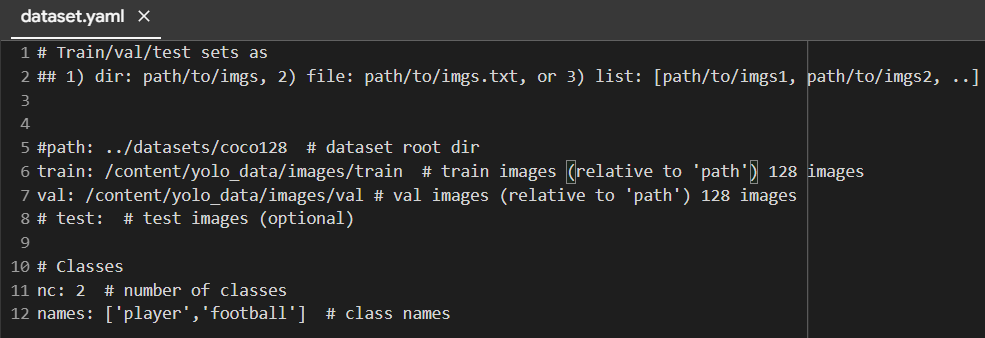

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.216 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/78.2 GB disk)


# Command Line Interface:


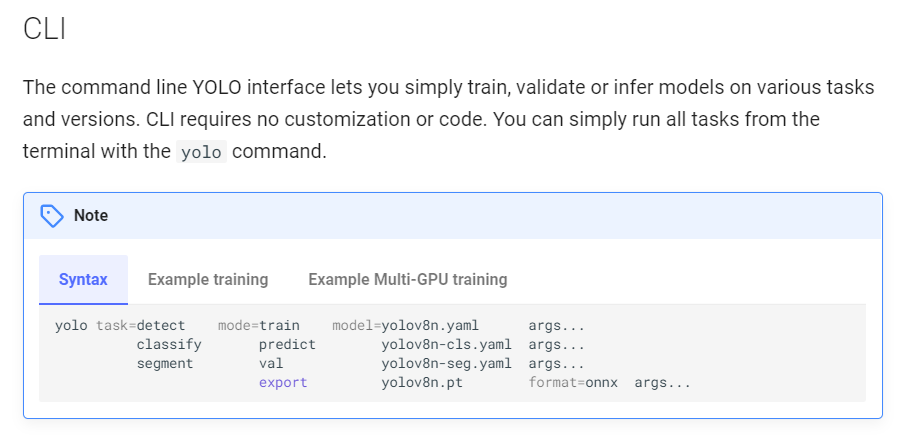

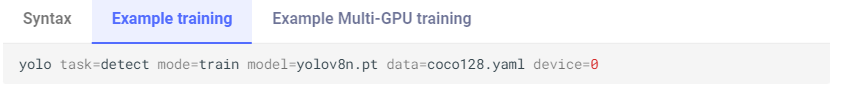

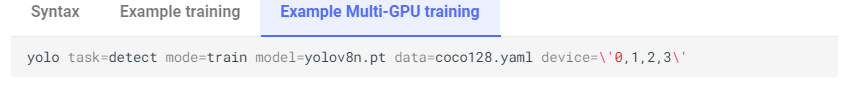

## Training

In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data=/content/drive/MyDrive/yolov8drone/dataset.yaml epochs=100 imgsz=640 batch=16 project=/content/drive/MyDrive/yolov8drone/training_results name=drone_nano

100% 6.23M/6.23M [00:00<00:00, 193MB/s]
Ultralytics YOLOv8.0.215 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/yolov8drone/dataset.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/yolov8drone/training_results, name=drone_nano, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augm

## Inferencing

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/yolov8drone/training_results/drone_nano/weights/best.pt conf=0.55 source=/content/drive/MyDrive/yolov8drone/test_images save=True

Ultralytics YOLOv8.0.215 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/100 /content/drive/MyDrive/yolov8drone/test_images/VS_N1.jpg: 480x640 (no detections), 61.5ms
image 2/100 /content/drive/MyDrive/yolov8drone/test_images/VS_N1031.jpg: 480x640 (no detections), 20.8ms
image 3/100 /content/drive/MyDrive/yolov8drone/test_images/VS_N1090.jpg: 480x640 (no detections), 11.1ms
image 4/100 /content/drive/MyDrive/yolov8drone/test_images/VS_N1127.jpg: 480x640 (no detections), 9.3ms
image 5/100 /content/drive/MyDrive/yolov8drone/test_images/VS_N113.jpg: 480x640 (no detections), 6.7ms
image 6/100 /content/drive/MyDrive/yolov8drone/test_images/VS_N1189.jpg: 480x640 (no detections), 6.7ms
image 7/100 /content/drive/MyDrive/yolov8drone/test_images/VS_N1225.jpg: 480x640 (no detections), 6.6ms
image 8/100 /content/drive/MyDrive/yolov8drone/test_images/VS_N1315.jpg: 480x640 (no detections), 6.7ms
i

In [ ]:
!cp -r /content/runs/detect/predict /content/drive/MyDrive/yolov8drone/output

### inferencing on video


In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/yolov8drone/training_results/drone_medium2/weights/best.pt conf=0.35 source=/content/drive/MyDrive/yolov8drone/videos save=True

Streaming output truncated to the last 5000 lines.
video 48/64 (315/318) /content/drive/MyDrive/yolov8drone/videos/V_DRONE_098.mp4: 640x800 1 drone, 9.3ms
video 48/64 (316/318) /content/drive/MyDrive/yolov8drone/videos/V_DRONE_098.mp4: 640x800 1 drone, 9.2ms
video 48/64 (317/318) /content/drive/MyDrive/yolov8drone/videos/V_DRONE_098.mp4: 640x800 1 drone, 10.1ms
video 48/64 (318/318) /content/drive/MyDrive/yolov8drone/videos/V_DRONE_098.mp4: 640x800 1 drone, 9.8ms
video 49/64 (1/309) /content/drive/MyDrive/yolov8drone/videos/V_DRONE_099.mp4: 640x800 1 drone, 22.1ms
video 49/64 (2/309) /content/drive/MyDrive/yolov8drone/videos/V_DRONE_099.mp4: 640x800 1 drone, 9.3ms
video 49/64 (3/309) /content/drive/MyDrive/yolov8drone/videos/V_DRONE_099.mp4: 640x800 1 drone, 9.2ms
video 49/64 (4/309) /content/drive/MyDrive/yolov8drone/videos/V_DRONE_099.mp4: 640x800 1 drone, 9.3ms
video 49/64 (5/309) /content/drive/MyDrive/yolov8drone/videos/V_DRONE_099.mp4: 640x800 1 drone, 9.2ms
video 49/64 (6/309) /

In [ ]:
!cp -r /content/runs/detect/predict2 /content/drive/MyDrive/yolov8drone/output/Medium2

Convert to TensorFlow.js

In [ ]:
!cp -r /content/drive/MyDrive/yolov8drone/training_results/drone_nano/weights/best.pt /content

In [ ]:
!pip install tensorflow tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 88.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 72.6 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalle

In [ ]:
import tensorflow as tf

saved_model_dir = '/content/best_saved_model'  # Ganti dengan path yang sesuai dengan model SavedModel Anda

model = tf.saved_model.load(saved_model_dir)
print("Tanda Tangan yang Tersedia:", model.signatures)


Tanda Tangan yang Tersedia: _SignatureMap({})


In [ ]:
# !yolo task=detect mode=predict model=/content/drive/MyDrive/yolov8/training_results/football2/weights/best.pt conf=0.5 source=/content/drive/MyDrive/yolov8/videos

In [ ]:
# !cp -r /content/runs/detect/predict3 /content/drive/MyDrive/yolov8/output

## Export the model -- In progress

Export a YOLOv8 model to any supported format with the `format` argument, i.e. `format=onnx`.

Format                  | `format=...**bold text**`         | Model
---                     | ---                       | ---
PyTorch                 | -                         | yolov8n.pt
TorchScript             | `torchscript`             | yolov8n.torchscript
ONNX                    | `onnx`                    | yolov8n.onnx
OpenVINO                | `openvino`                | yolov8n_openvino_model/
TensorRT                | `engine`                  | yolov8n.engine
CoreML                  | `coreml`                  | yolov8n.mlmodel
TensorFlow SavedModel   | `saved_model`             | yolov8n_saved_model/
TensorFlow GraphDef     | `pb`                      | yolov8n.pb
TensorFlow Lite         | `tflite`                  | yolov8n.tflite
TensorFlow Edge TPU     | `edgetpu`                 | yolov8n_edgetpu.tflite
TensorFlow.js           | `tfjs`                    | yolov8n_web_model/
PaddlePaddle            | `paddle`                  | yolov8n_paddle_model/

In [ ]:
!yolo mode=export model=/content/drive/MyDrive/yolov8drone/training_results/drone_medium/weights/best.pt format=onnx

Ultralytics YOLOv8.0.211 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/yolov8drone/training_results/drone_medium/weights/best.pt' with input shape (1, 3, 800, 800) BCHW and output shape(s) (1, 5, 13125) (49.6 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 74.8 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 7.5s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: export success ✅ 10.4s, saved as '/content/drive/MyDrive/yolov8drone/training_results/drone_medium/weights/best.onnx' (98.9 MB)

Export complete (16.8s)
Results saved to /content/drive/MyDrive/yolov8drone/training_results/drone_medium/weights
Predict:     

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('/content/drive/MyDrive/yolov8drone/training_results/drone_nano/weights/best.pt')  # load a custom trained model

# Export the model
model.export(format='tfjs')

Ultralytics YOLOv8.0.215 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/yolov8drone/training_results/drone_nano/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx', 'onnx2tf>=1.15.4,<=1.17.5', 'sng4onnx>=1.0.1', 'onnxsim>=0.4.33', 'onnx_graphsurgeon>=0.3.26', 'tflite_support', 'onnxruntime'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 265.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 271.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 268.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

ImportError: ignored